In [50]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 

In [51]:
# the following notebook fits a linear regression model to predict stock prices of apple 30 days into the future

#uses quandl WIKI package to get Data
quandl.ApiConfig.api_key = 'TwfA59hcz8C3A2BoAJoT'

df= quandl.get("WIKI/AAPL")
# just plotting the adjusted close to account for inflation 
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


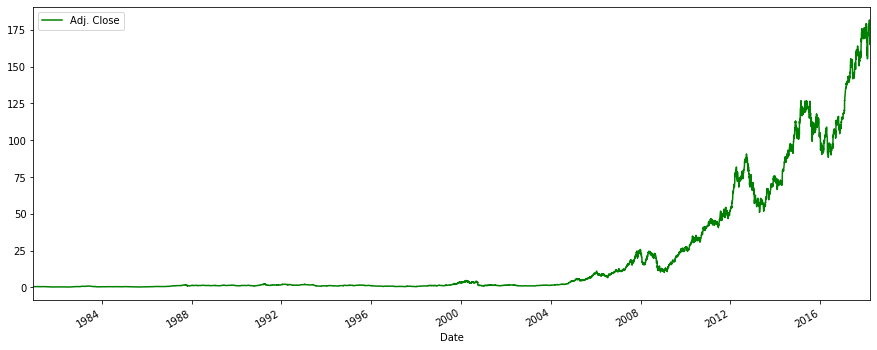

In [52]:
# plot of AAPL stock prices by EOD 
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [53]:
#set up prediction model
forecast = 30
df['Prediction'] = df['Adj. Close'].shift(-forecast)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast] 

y = np.array(df['Prediction'])
y = y[:-forecast]

In [54]:
#split up data for test and train (split 20% and 80% respective ) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

#estimator instance (classifier)
clf = LinearRegression()

#fit Linear regression to current data
clf.fit(X_train, y_train)

#check confidence to see how linear data is 
confidence = clf.score(X_test, y_test)
confidence

# View predicted Stock price
forecast_predicted = clf.predict(X_forecast)
forecast_predicted

array([167.76951625, 170.86064689, 176.59403111, 176.02273304,
       175.43103147, 174.63529487, 176.19616281, 179.21078032,
       182.69467839, 182.10297681, 181.82752953, 178.64458312,
       179.87899503, 180.50130186, 180.34827559, 178.67518838,
       180.62372287, 183.72505527, 185.50015999, 183.71485352,
       182.15398557, 182.36822235, 181.72551201, 178.95063566,
       178.88942516, 174.83932989, 172.3654052 , 168.38162132,
       176.36959259, 171.85021676])

(736080.0, 736810.0)

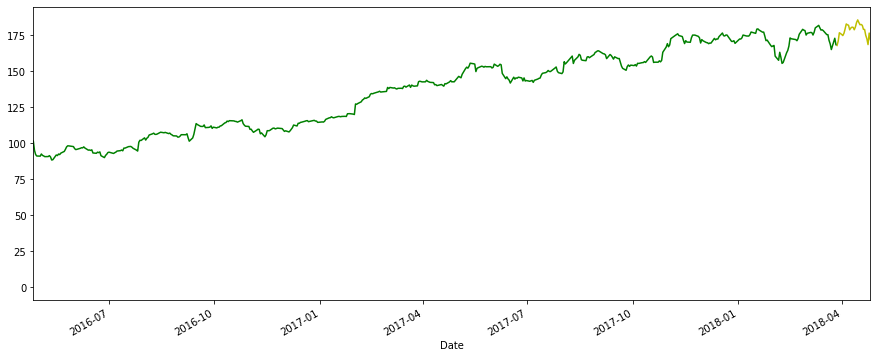

In [58]:
# add the forecasted days stock price to the plot from before 
dates = pd.date_range(start= "2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted, color='y')
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.xlim(xmin=datetime.date(2016,4,26))